In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from gseapy import enrichr
from gseapy.plot import barplot, dotplot

from pylab import rcParams
rcParams['pdf.fonttype']=42
rcParams['font.sans-serif'] = "Arial"
rcParams['font.family'] = "sans-serif"
rcParams['font.size']=10


In [2]:
pairs_list_1=pd.read_csv(r'',header=0,nrows=17000)
pairs_list_2=pd.read_csv(r'',header=0,nrows=17000)

print(len(pairs_list_1),len(pairs_list_2))

17000 17000


In [3]:
unique_genes_list1=list(set(pairs_list_1['Gene1'].values.tolist() + pairs_list_1['Gene2'].values.tolist()))
unique_genes_list2=list(set(pairs_list_2['Gene1'].values.tolist() + pairs_list_2['Gene2'].values.tolist()))

print(len(unique_genes_list1))
print(len(unique_genes_list2))

9071
8583


In [4]:

exclusive_genes_list1=np.setdiff1d(unique_genes_list1,unique_genes_list2)
exclusive_genes_list2=np.setdiff1d(unique_genes_list2,unique_genes_list1)

print(len(exclusive_genes_list1))
print(len(exclusive_genes_list2))

2379
1891


In [5]:
int_genes=np.intersect1d(unique_genes_list1,unique_genes_list2)
print(len(int_genes))

6692


Text(0.5, 1.0, ' Ceres-PCAWhitened Top17K vs Chronos-PCAWhitened Top17K ')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


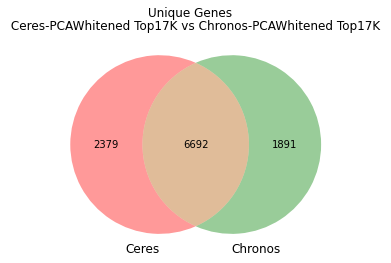

In [6]:
venn2_unweighted(subsets=(len(exclusive_genes_list1),len(exclusive_genes_list2),len(int_genes)),set_labels=('Ceres','Chronos'))
plt.suptitle('Unique Genes')
plt.title(' Ceres-PCAWhitened Top17K vs Chronos-PCAWhitened Top17K ')

In [7]:
int_genes=list(int_genes)
exclusive_genes_list1=list(exclusive_genes_list1)
exclusive_genes_list2=list(exclusive_genes_list2)

In [8]:
enrich_1=enrichr(gene_list=exclusive_genes_list1, organism='Human',gene_sets=['GO_Biological_Process_2021','GO_Cellular_Component_2021','GO_Molecular_Function_2021','KEGG_2021_Human'], format = 'png', outdir='Enrich_1_G')
enrich_2=enrichr(gene_list=exclusive_genes_list2, organism='Human',gene_sets=['GO_Biological_Process_2021','GO_Cellular_Component_2021','GO_Molecular_Function_2021','KEGG_2021_Human'], format = 'png', outdir='Enrich_2_G')
enrich_int=enrichr(gene_list=int_genes, organism='Human',gene_sets=['GO_Biological_Process_2021','GO_Cellular_Component_2021','GO_Molecular_Function_2021','KEGG_2021_Human'], format = 'png', outdir='Enrich_int_G')


2022-08-04 12:24:58,316 Warning: No enrich terms using library GO_Biological_Process_2021 when cutoff = 0.05
2022-08-04 12:25:06,806 Warning: No enrich terms using library GO_Molecular_Function_2021 when cutoff = 0.05


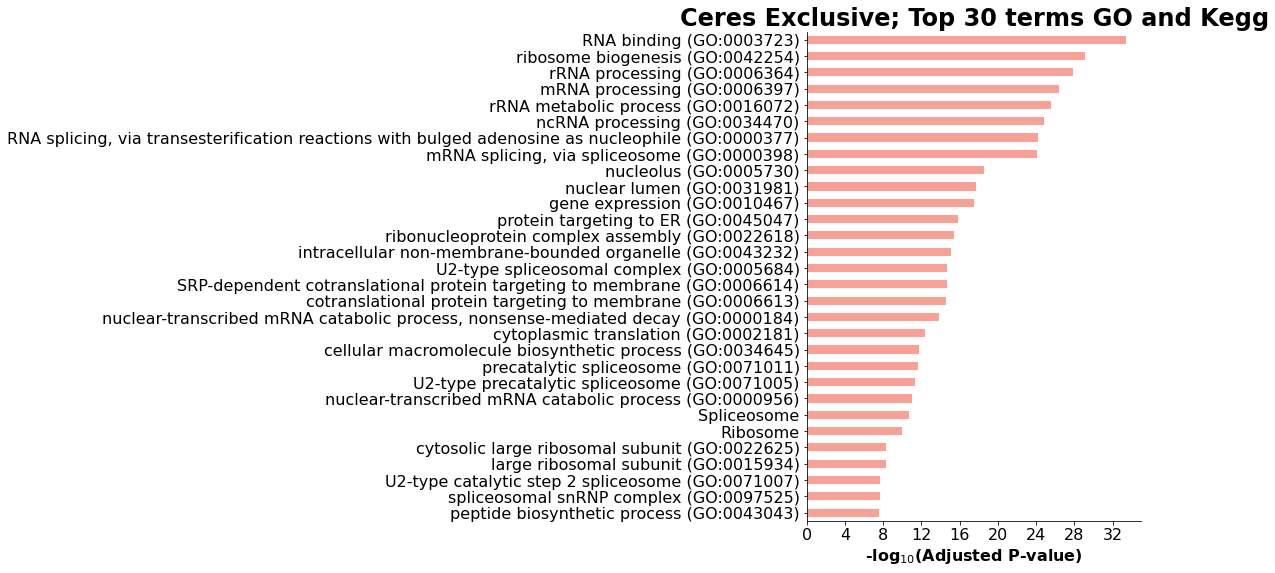

In [9]:
barplot(enrich_1.results, top_term=30, figsize=(6,9), title='Ceres Exclusive; Top 30 terms GO and Kegg' )


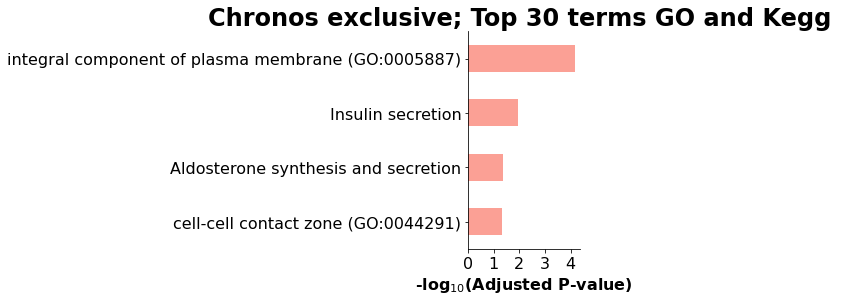

In [10]:
barplot(enrich_2.results, top_term=30, figsize=(2,4),title="Chronos exclusive; Top 30 terms GO and Kegg")


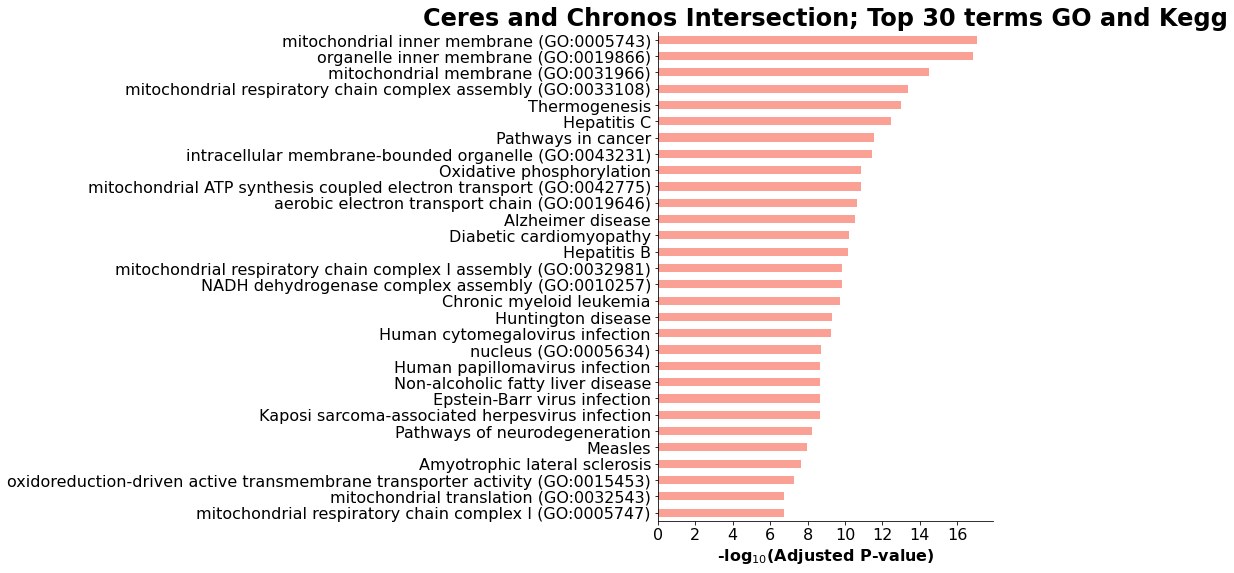

In [11]:
barplot(enrich_int.results,top_term=30,figsize=(6,9), title="Ceres and Chronos Intersection; Top 30 terms GO and Kegg" )


In [12]:
pairs_list_1.sort_values(by='Gene1', inplace=True)
pairs_list_2.sort_values(by='Gene1', inplace=True)


In [13]:
pairs_list_1["Pair"]=pairs_list_1['Gene1']+"_"+pairs_list_1['Gene2']
print(pairs_list_1.head(5))

pairs_list_2["Pair"]=pairs_list_2['Gene1']+"_"+pairs_list_2['Gene2']
print(pairs_list_2.head(5))

      Gene1   Gene2       PCC         Pair
10078  A1BG  ZNF132  0.196376  A1BG_ZNF132
3743   A1BG  ZBTB45  0.244040  A1BG_ZBTB45
3422   A1BG  ZNF497  0.248867  A1BG_ZNF497
10027  A1BG    MZF1  0.196559    A1BG_MZF1
5687   A1BG  ZNF324  0.220338  A1BG_ZNF324
      Gene1    Gene2       PCC          Pair
3819   A1BG   ZNF497  0.249720   A1BG_ZNF497
3586   A1BG     MZF1  0.252723     A1BG_MZF1
2334   A1BG  SLC27A5  0.277937  A1BG_SLC27A5
6655   A1BG   ZBTB45  0.224201   A1BG_ZBTB45
14673  A1BG   ZNF132  0.194744   A1BG_ZNF132


In [14]:
int_pairs=np.intersect1d(pairs_list_1['Pair'],pairs_list_2['Pair'])
print(len(int_pairs))

exclusive_numofpairs1=len(pairs_list_1)-len(int_pairs)
print(exclusive_numofpairs1)
exclusive_numofpairs2=len(pairs_list_2)-len(int_pairs)
print(exclusive_numofpairs2)

9358
7642
7642


Text(0.5, 1.0, 'Ceres+PCA Whitening Top17K vs Chronos+PCA Whitening Top17K')

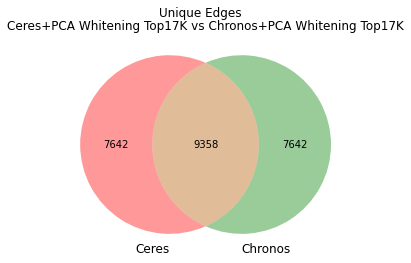

In [15]:
venn2_unweighted(subsets=(exclusive_numofpairs1,exclusive_numofpairs2,len(int_pairs)),set_labels=('Ceres','Chronos'))
plt.suptitle('Unique Edges')
plt.title('Ceres+PCA Whitening Top17K vs Chronos+PCA Whitening Top17K')


In [16]:
intersection_1=pairs_list_1[pairs_list_1['Pair'].isin(int_pairs)==True].sort_values(by=['Pair'])
intersection_2=pairs_list_2[pairs_list_2['Pair'].isin(int_pairs)==True].sort_values(by=['Pair'])

exclusivepairs_1=pairs_list_1[pairs_list_1['Pair'].isin(int_pairs)==False]
exclusivepairs_2=pairs_list_2[pairs_list_2['Pair'].isin(int_pairs)==False]

exclusivepairs_1.rename(columns={"PCC":"PCC_1"}, inplace=True)
exclusivepairs_2.rename(columns={"PCC":"PCC_2"}, inplace=True)

intersection_1.rename(columns={"PCC":"PCC_1"}, inplace=True)
intersection_2.rename(columns={"PCC":"PCC_2"}, inplace=True)

intersection_df=pd.merge(intersection_1,intersection_2,on="Pair")
print(intersection_df.head(10))

  Gene1_x  Gene2_x     PCC_1          Pair Gene1_y  Gene2_y     PCC_2
0    A1BG     MZF1  0.196559     A1BG_MZF1    A1BG     MZF1  0.252723
1    A1BG  SLC27A5  0.227883  A1BG_SLC27A5    A1BG  SLC27A5  0.277937
2    A1BG   ZBTB45  0.244040   A1BG_ZBTB45    A1BG   ZBTB45  0.224201
3    A1BG   ZNF132  0.196376   A1BG_ZNF132    A1BG   ZNF132  0.194744
4    A1BG   ZNF497  0.248867   A1BG_ZNF497    A1BG   ZNF497  0.249720
5    AAAS     NDC1  0.467990     AAAS_NDC1    AAAS     NDC1  0.457687
6    AAAS    NUP35  0.288210    AAAS_NUP35    AAAS    NUP35  0.262219
7   AAGAB    AP1B1  0.226853   AAGAB_AP1B1   AAGAB    AP1B1  0.193359
8   AAGAB    AP1G1  0.237442   AAGAB_AP1G1   AAGAB    AP1G1  0.214183
9   AAGAB    AP2S1  0.291226   AAGAB_AP2S1   AAGAB    AP2S1  0.220984


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4438: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [17]:
print(len(int_pairs))
print(exclusive_numofpairs2)

print(exclusive_numofpairs1)

9358
7642
7642


Text(0.5, 1.0, 'Ceres+PCA Whitening Top17K vs Chronos+PCA Whitening Top17K')

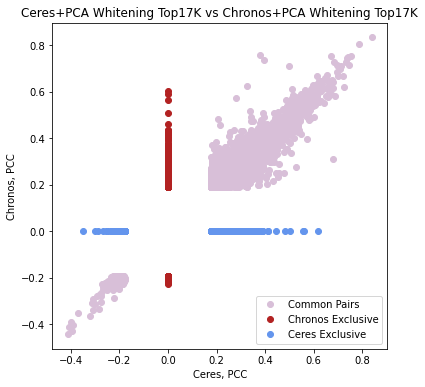

In [18]:
fig, ax= plt.subplots(figsize=(6,6))

plt.plot(intersection_df['PCC_1'],intersection_df['PCC_2'],'s', marker='o',color='thistle',label='Common Pairs')

# on y axis
plt.plot(np.zeros(len(exclusivepairs_2)),exclusivepairs_2['PCC_2'] ,'s', marker='o', color='firebrick',label='Chronos Exclusive')
plt.ylabel('Chronos, PCC')

# on x axis
plt.plot(exclusivepairs_1['PCC_1'],np.zeros(len(exclusivepairs_1)),'s', marker='o',color='cornflowerblue',label='Ceres Exclusive')
plt.xlabel('Ceres, PCC')

plt.legend(loc='lower right')
plt.title('Ceres+PCA Whitening Top17K vs Chronos+PCA Whitening Top17K')
